In [2]:
pip install librosa

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

In [5]:
file = 'dataset/TrainAudioFiles/0.mp3'

/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


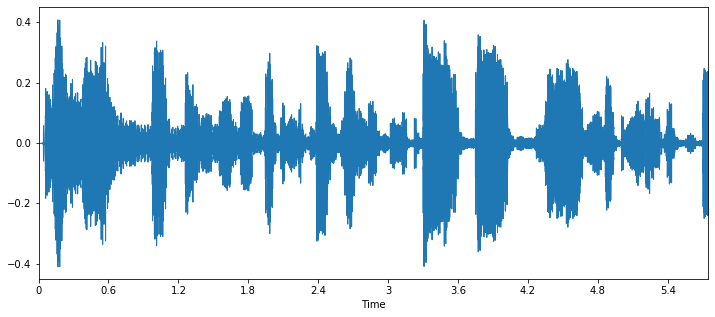

In [6]:
 # ploting the signal from the audio file
plt.figure(figsize=(12,5))
data , sample_rate = librosa.load(file)
librosa.display.waveplot(data,sr = sample_rate)
ipd.Audio(file)

In [7]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.00043626,
       -0.00015566,  0.00039551], dtype=float32)

sample_rate

In [8]:
sample_rate

22050

In [14]:
train_file = 'dataset/train.csv'

import pandas as pd

train_dataset = pd.read_csv(train_file)
train_dataset.head()

,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral


In [18]:
### check if the dataset is imbalanced
train_dataset['emotion'].value_counts()

neutral     2630
joy          967
surprise     640
anger        596
sadness      344
fear         328
disgust      311
Name: emotion, dtype: int64

In [18]:
# DATA Preprocessing
import pandas as pd
import os
import librosa

audio_data_path= 'dataset/TrainAudioFiles'
audio_meta_data = pd.read_csv('dataset/train.csv')
audio_meta_data.head()


,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral


In [19]:
# feature extractor
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=30)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [20]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(audio_meta_data.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_data_path),str(row["filename"]))
    final_class_labels=row["emotion"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1it [00:00,  2.46it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2it [00:00,  3.37it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3it [00:00,  4.43it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4it [00:00,  4.58it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFil

40it [00:07,  5.31it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
41it [00:07,  5.41it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
42it [00:07,  5.62it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
43it [00:08,  5.48it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
44it [00:08,  5.06it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: P

79it [00:14,  4.94it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
80it [00:15,  4.86it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
81it [00:15,  4.81it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
82it [00:15,  5.11it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
83it [00:15,  5.45it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: P

120it [00:22,  4.81it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
121it [00:23,  4.06it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
122it [00:23,  4.17it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
123it [00:23,  4.09it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
125it [00:23,  5.12it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

162it [00:30,  5.39it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
163it [00:30,  5.70it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
164it [00:31,  5.26it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
165it [00:31,  5.34it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
166it [00:31,  5.70it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

204it [00:38,  7.53it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
205it [00:38,  7.12it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
206it [00:38,  5.03it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
207it [00:38,  5.45it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
208it [00:39,  5.66it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

244it [00:43,  6.90it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
245it [00:43,  7.45it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
246it [00:44,  6.89it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
247it [00:44,  6.96it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
248it [00:44,  6.66it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

282it [00:49,  6.63it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
283it [00:49,  6.27it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
284it [00:49,  5.96it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
285it [00:49,  5.82it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
287it [00:49,  7.54it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

323it [00:55,  8.32it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
324it [00:55,  8.48it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
325it [00:55,  6.73it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
328it [00:55,  7.03it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
329it [00:55,  6.78it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

364it [01:00,  5.95it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
365it [01:01,  5.96it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
367it [01:01,  8.09it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
368it [01:01,  7.54it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
369it [01:01,  7.58it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

405it [01:06,  7.80it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
406it [01:06,  6.91it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
407it [01:06,  6.74it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
408it [01:07,  6.58it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
409it [01:07,  6.78it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

442it [01:11,  7.67it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
443it [01:11,  7.20it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
444it [01:12,  7.67it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
445it [01:12,  6.13it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
446it [01:12,  6.81it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

487it [01:17,  7.19it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
488it [01:18,  7.36it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
489it [01:18,  7.05it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
490it [01:18,  7.40it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
491it [01:18,  7.64it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

528it [01:23,  4.63it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
529it [01:23,  5.25it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
530it [01:24,  5.43it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
531it [01:24,  5.73it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
532it [01:24,  5.67it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

566it [01:28,  6.97it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
567it [01:29,  6.43it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
568it [01:29,  6.62it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
569it [01:29,  6.95it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
570it [01:29,  7.26it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

605it [01:34,  7.40it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
607it [01:34,  7.90it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
608it [01:34,  7.37it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
609it [01:34,  7.54it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. 

646it [01:39,  7.50it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
647it [01:39,  7.18it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
648it [01:39,  7.54it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
649it [01:39,  6.27it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
650it [01:39,  7.02it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

684it [01:44,  7.52it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
685it [01:44,  7.40it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
686it [01:44,  7.76it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
688it [01:44,  8.69it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. 

725it [01:49,  7.98it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
726it [01:49,  7.97it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
728it [01:49,  9.85it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
729it [01:49,  9.36it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
730it [01:49,  8.85it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
767it [01:54,  9.27it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
768it [01:54,  8.16it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
769it [01:54,  8.11it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
770it [01:54,  8.48it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. 

806it [01:59,  7.35it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
808it [01:59,  6.29it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
809it [01:59,  5.57it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
811it [02:00,  6.74it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
812it [02:00,  6.32it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

847it [02:04,  7.21it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
848it [02:04,  7.41it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
849it [02:04,  7.41it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
850it [02:05,  7.80it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
851it [02:05,  7.93it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

886it [02:10,  7.49it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
888it [02:10,  9.16it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
889it [02:10,  8.51it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
890it [02:10,  7.38it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
891it [02:11,  7.59it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

928it [02:15,  8.08it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
929it [02:15,  7.20it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
930it [02:16,  7.57it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
931it [02:16,  7.37it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
932it [02:16,  7.70it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

967it [02:21,  7.60it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
968it [02:21,  6.79it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
969it [02:21,  7.28it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
970it [02:21,  7.28it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
971it [02:21,  7.39it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarni

1008it [02:26,  7.42it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1009it [02:26,  7.63it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1010it [02:26,  7.44it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1011it [02:26,  7.65it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1012it [02:26,  7.89it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1050it [02:31,  7.23it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1051it [02:31,  7.44it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1053it [02:31,  7.53it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1055it [02:31,  8.53it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile fail

/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1092it [02:37,  7.86it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1093it [02:37,  7.78it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1094it [02:37,  7.93it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1095it [02:37,  7.96it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile fail

1134it [02:42,  7.82it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1135it [02:42,  7.88it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1136it [02:42,  7.84it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1137it [02:42,  8.15it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1138it [02:42,  8.20it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1172it [02:47,  3.61it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1175it [02:48,  6.21it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1177it [02:48,  7.68it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1178it [02:48,  7.70it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1179it [02:48,  7.84it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1214it [02:53,  6.70it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1215it [02:53,  6.66it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1216it [02:53,  6.95it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1217it [02:53,  7.00it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1218it [02:53,  7.01it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1257it [02:58,  8.53it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1258it [02:58,  7.52it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1259it [02:58,  7.67it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1260it [02:59,  7.52it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1262it [02:59,  7.70it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1298it [03:04,  7.58it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1299it [03:04,  6.37it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1300it [03:04,  6.14it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1301it [03:04,  6.54it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1302it [03:05,  6.44it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1338it [03:11,  8.68it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1339it [03:11,  7.77it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1340it [03:11,  7.20it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1341it [03:11,  6.91it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1342it [03:11,  7.22it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1379it [03:17,  6.28it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1380it [03:17,  6.47it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1381it [03:17,  5.88it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1382it [03:18,  6.10it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1383it [03:18,  6.41it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1422it [03:23,  6.30it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1423it [03:23,  6.74it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1424it [03:23,  7.19it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1425it [03:23,  6.63it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1426it [03:23,  7.11it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1462it [03:28,  7.30it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1463it [03:28,  7.08it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1465it [03:29,  8.25it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1466it [03:29,  8.30it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1467it [03:29,  6.36it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1503it [03:35,  7.16it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1504it [03:35,  7.12it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1505it [03:35,  6.89it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1506it [03:35,  6.64it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1507it [03:35,  6.26it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1543it [03:40,  7.75it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1544it [03:41,  6.45it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1545it [03:41,  6.66it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1546it [03:41,  5.86it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1547it [03:41,  6.46it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1582it [03:45,  8.60it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1583it [03:45,  8.46it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1584it [03:46,  8.44it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1585it [03:46,  8.39it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1586it [03:46,  8.15it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1626it [03:51,  9.72it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1628it [03:51,  7.80it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1629it [03:52,  7.19it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

1664it [03:56,  6.66it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1665it [03:57,  5.72it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1667it [03:57,  7.48it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1669it [03:57,  8.43it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1670it [03:57,  8.08it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1706it [04:03,  5.51it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1707it [04:03,  5.69it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1708it [04:03,  6.34it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1709it [04:03,  6.52it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1713it [04:04, 11.82it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1748it [04:08,  7.60it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1749it [04:09,  7.84it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1750it [04:09,  7.94it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1753it [04:09,  9.63it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile fail

1790it [04:15,  4.84it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1791it [04:15,  5.36it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1792it [04:15,  5.44it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1793it [04:15,  5.17it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1794it [04:15,  5.98it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1832it [04:20,  8.68it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1833it [04:21,  7.65it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1834it [04:21,  7.35it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1835it [04:21,  7.17it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1836it [04:21,  7.31it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1872it [04:26,  6.32it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1873it [04:26,  6.93it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1874it [04:26,  6.70it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1875it [04:27,  7.24it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1876it [04:27,  7.68it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1910it [04:32,  6.95it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1911it [04:32,  6.47it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1912it [04:32,  6.20it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1913it [04:33,  6.51it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1914it [04:33,  6.65it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

1948it [04:37,  6.93it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1949it [04:37,  7.18it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1950it [04:38,  6.55it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1952it [04:38,  7.58it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile fail

1989it [04:44,  6.18it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1990it [04:44,  6.24it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1991it [04:44,  6.53it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1992it [04:44,  6.49it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
1993it [04:44,  6.62it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2033it [04:49,  8.32it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2034it [04:50,  4.59it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2035it [04:50,  3.90it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2036it [04:50,  4.13it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2037it [04:50,  4.71it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2073it [04:55,  6.81it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2074it [04:56,  6.41it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2075it [04:56,  6.40it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2076it [04:56,  6.81it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2077it [04:56,  6.40it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2112it [05:01,  8.08it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2113it [05:01,  8.22it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2114it [05:01,  8.29it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2116it [05:01,  9.68it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2117it [05:01,  8.73it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2155it [05:06, 10.21it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2157it [05:06,  8.54it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2158it [05:07,  8.50it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2159it [05:07,  8.43it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile fail

2192it [05:11,  7.26it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2193it [05:12,  6.93it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2194it [05:12,  6.39it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2195it [05:12,  6.81it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2196it [05:12,  7.45it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2237it [05:17,  7.50it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2238it [05:17,  7.11it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2239it [05:17,  7.37it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2240it [05:17,  7.70it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2241it [05:18,  8.00it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2276it [05:23,  8.07it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2277it [05:23,  7.94it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2278it [05:23,  6.27it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2279it [05:23,  6.71it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2280it [05:23,  6.34it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2319it [05:29,  6.13it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2320it [05:29,  6.55it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2321it [05:29,  6.48it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2322it [05:29,  6.15it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2323it [05:30,  6.18it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2358it [05:35,  7.02it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2359it [05:35,  7.11it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2360it [05:35,  6.71it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2362it [05:35,  8.63it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2363it [05:35,  7.85it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2397it [05:40,  5.95it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2398it [05:40,  6.14it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2399it [05:40,  5.99it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2400it [05:41,  6.72it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2401it [05:41,  7.33it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2440it [05:46,  6.79it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2441it [05:46,  6.98it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2442it [05:46,  6.53it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2443it [05:46,  5.91it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile fail

2481it [05:52,  7.88it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2482it [05:52,  6.80it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2484it [05:52,  7.95it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2485it [05:53,  7.62it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2486it [05:53,  6.99it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2522it [05:58,  6.58it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2523it [05:58,  6.25it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2524it [05:58,  6.08it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2526it [05:59,  7.10it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2527it [05:59,  7.10it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2565it [06:04,  7.33it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2567it [06:04,  8.10it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2568it [06:04,  7.17it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2569it [06:04,  7.28it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2570it [06:04,  7.45it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2609it [06:09,  7.17it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2610it [06:10,  7.47it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2611it [06:10,  7.78it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2612it [06:10,  7.20it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2613it [06:10,  7.26it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2651it [06:15,  7.73it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2652it [06:15,  7.73it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2654it [06:15,  8.59it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2655it [06:15,  8.51it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2656it [06:15,  7.96it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2690it [06:20,  6.92it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2691it [06:20,  6.75it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2692it [06:21,  6.10it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2693it [06:21,  6.61it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2694it [06:21,  6.79it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2735it [06:26,  9.09it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2736it [06:26,  8.35it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2737it [06:26,  8.43it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2738it [06:27,  7.48it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2739it [06:27,  6.84it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2778it [06:31,  8.89it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2779it [06:31,  8.01it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2780it [06:32,  7.94it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2781it [06:32,  8.32it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2782it [06:32,  8.38it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2818it [06:37,  8.10it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2819it [06:37,  7.70it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2820it [06:37,  6.73it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2821it [06:38,  6.97it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2826it [06:38, 12.77it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2861it [06:43,  7.15it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2862it [06:43,  7.06it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2863it [06:43,  7.01it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2864it [06:43,  6.84it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2865it [06:43,  6.32it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2901it [06:48,  7.93it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2903it [06:48,  6.94it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2905it [06:49,  6.37it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2906it [06:49,  6.42it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2907it [06:49,  6.52it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2943it [06:54,  8.26it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2944it [06:54,  8.07it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2945it [06:54,  7.58it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2946it [06:54,  7.63it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2947it [06:54,  8.13it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

2985it [07:00,  6.22it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2986it [07:00,  6.70it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2987it [07:00,  6.52it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2988it [07:00,  6.84it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
2989it [07:00,  7.20it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3022it [07:05,  5.54it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3023it [07:06,  6.13it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3024it [07:06,  6.65it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3025it [07:06,  6.19it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3026it [07:06,  6.20it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3064it [07:11,  5.94it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3065it [07:11,  6.17it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3066it [07:11,  5.62it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3067it [07:12,  6.37it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3068it [07:12,  6.78it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3104it [07:16,  8.63it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3105it [07:16,  8.44it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3106it [07:16,  8.42it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3107it [07:16,  8.44it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3108it [07:16,  7.11it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3146it [07:21,  8.40it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3147it [07:21,  8.39it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3149it [07:21, 10.36it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

3185it [07:26,  7.21it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3186it [07:26,  7.28it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3187it [07:26,  7.26it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3188it [07:26,  7.69it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3189it [07:26,  7.80it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3228it [07:31,  7.86it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3230it [07:31,  9.36it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3231it [07:31,  8.90it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3232it [07:31,  7.87it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3233it [07:32,  7.08it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3269it [07:37,  7.43it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3270it [07:37,  7.02it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3271it [07:37,  7.27it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3272it [07:37,  7.81it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3273it [07:38,  6.66it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3306it [07:43,  6.38it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3307it [07:43,  6.62it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3308it [07:43,  6.40it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3309it [07:43,  6.34it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3310it [07:43,  6.68it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3346it [07:48,  9.31it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3347it [07:48,  8.73it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3348it [07:48,  8.27it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3349it [07:48,  8.34it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3350it [07:48,  8.46it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3386it [07:54,  7.80it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3387it [07:54,  7.25it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3388it [07:54,  6.78it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3390it [07:54,  7.26it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3391it [07:54,  6.73it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3430it [07:59,  6.99it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3431it [08:00,  7.33it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3433it [08:00,  9.46it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3434it [08:00,  9.23it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3435it [08:00,  9.39it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3472it [08:05,  6.96it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3473it [08:05,  6.35it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3474it [08:06,  5.75it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3475it [08:06,  6.28it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3476it [08:06,  6.08it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3516it [08:11,  5.66it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3517it [08:11,  5.87it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3519it [08:11,  7.27it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3522it [08:12,  9.77it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3523it [08:12,  7.89it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3560it [08:17,  7.18it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3561it [08:17,  6.99it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3562it [08:17,  6.87it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3563it [08:18,  6.61it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3564it [08:18,  6.40it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3601it [08:23,  7.92it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3603it [08:23,  7.72it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3605it [08:23,  8.90it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3607it [08:23,  8.33it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3608it [08:24,  6.93it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3643it [08:29,  8.29it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3644it [08:29,  7.71it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3646it [08:29,  9.10it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3647it [08:29,  8.37it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3649it [08:30,  9.20it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3683it [08:35,  7.93it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3684it [08:35,  7.25it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3685it [08:35,  6.99it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3686it [08:36,  7.17it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3688it [08:36,  9.37it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3723it [08:41,  6.77it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3724it [08:41,  7.29it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3725it [08:41,  7.31it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3726it [08:41,  7.53it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3728it [08:42,  9.27it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3765it [08:47,  6.66it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3766it [08:47,  5.97it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3767it [08:47,  6.59it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3768it [08:48,  6.83it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3769it [08:48,  7.39it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3806it [08:53,  8.09it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3807it [08:53,  8.11it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3809it [08:53,  9.55it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3810it [08:53,  9.17it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3811it [08:54,  7.51it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3846it [08:58,  6.57it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3847it [08:58,  6.17it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3848it [08:59,  6.70it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3849it [08:59,  7.04it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3850it [08:59,  7.34it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3891it [09:03,  8.53it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3892it [09:03,  8.38it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3894it [09:04,  8.74it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3895it [09:04,  7.69it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile fail

3930it [09:08,  7.87it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3931it [09:09,  7.75it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3932it [09:09,  7.34it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3933it [09:09,  7.20it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3934it [09:09,  7.40it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

3974it [09:14, 11.51it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3976it [09:14,  9.85it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
3978it [09:14, 10.38it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

4013it [09:19,  7.47it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4014it [09:19,  7.14it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4015it [09:19,  7.49it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4017it [09:19,  9.85it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4018it [09:20,  9.55it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4055it [09:24,  6.81it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4056it [09:24,  7.02it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4057it [09:25,  6.60it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4058it [09:25,  6.30it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4060it [09:25,  8.54it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4095it [09:30,  6.97it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4097it [09:30,  7.76it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4098it [09:30,  7.42it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4099it [09:30,  6.83it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4100it [09:31,  7.19it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4137it [09:36,  5.73it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4138it [09:36,  5.36it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4139it [09:36,  5.35it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4140it [09:37,  5.25it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4142it [09:37,  6.54it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4178it [09:42,  6.70it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4179it [09:42,  6.84it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4180it [09:42,  7.14it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4181it [09:42,  7.40it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4182it [09:42,  6.85it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4216it [09:47,  7.84it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4217it [09:47,  7.61it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4219it [09:47,  9.51it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4220it [09:47,  9.12it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4221it [09:48,  8.92it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4256it [09:53,  6.86it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4257it [09:53,  6.71it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4258it [09:53,  7.08it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4260it [09:53,  8.29it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4261it [09:53,  7.34it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4299it [09:59,  6.72it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4300it [09:59,  6.92it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4301it [09:59,  6.40it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4302it [09:59,  6.02it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4303it [09:59,  5.50it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4336it [10:05,  5.52it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4337it [10:05,  6.09it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4339it [10:05,  7.05it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4341it [10:05,  7.17it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile fail

4375it [10:10,  6.46it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4376it [10:10,  5.95it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4377it [10:11,  5.83it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4378it [10:11,  5.83it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4379it [10:11,  5.77it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4412it [10:16,  7.20it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4413it [10:16,  7.40it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4415it [10:16,  9.31it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4416it [10:16,  8.91it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4417it [10:16,  8.19it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4454it [10:21,  7.35it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4455it [10:21,  7.85it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4456it [10:22,  7.35it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4457it [10:22,  7.86it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4458it [10:22,  6.95it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4492it [10:27,  6.89it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4493it [10:27,  6.78it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4494it [10:27,  7.28it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4495it [10:28,  7.62it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4496it [10:28,  7.67it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4532it [10:33,  7.17it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4533it [10:33,  7.16it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4534it [10:33,  7.46it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4535it [10:33,  7.36it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4537it [10:34,  8.86it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4572it [10:39,  7.58it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4573it [10:39,  6.88it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4574it [10:39,  6.98it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4575it [10:39,  7.39it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4576it [10:39,  7.58it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4615it [10:44,  8.89it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4617it [10:44,  8.33it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4619it [10:44,  9.45it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4620it [10:45,  8.72it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile fail

4653it [10:50,  7.31it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4654it [10:50,  7.57it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4655it [10:50,  6.80it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4656it [10:51,  7.23it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4659it [10:51,  9.27it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4692it [10:56,  7.23it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4693it [10:56,  6.66it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4695it [10:56,  8.22it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4696it [10:56,  7.74it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4697it [10:56,  8.01it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4733it [11:02,  6.38it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4734it [11:02,  6.84it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4735it [11:02,  6.69it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4736it [11:02,  6.65it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4737it [11:02,  6.52it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4774it [11:07,  7.18it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4775it [11:08,  7.20it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4776it [11:08,  7.08it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4777it [11:08,  7.46it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4778it [11:08,  7.44it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4815it [11:13,  8.20it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4816it [11:13,  8.09it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4817it [11:13,  7.38it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4818it [11:13,  7.75it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4819it [11:14,  7.30it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4854it [11:18,  6.77it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4855it [11:19,  7.12it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4856it [11:19,  6.73it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4857it [11:19,  6.18it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4858it [11:19,  6.36it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4900it [11:24,  7.93it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4901it [11:25,  7.67it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4902it [11:25,  3.93it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4903it [11:25,  3.63it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4904it [11:26,  4.33it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4942it [11:31,  4.58it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4943it [11:31,  4.54it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4944it [11:31,  5.25it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4945it [11:31,  5.82it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4946it [11:32,  6.33it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

4988it [11:37, 10.46it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4990it [11:37,  9.42it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
4992it [11:37,  8.87it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

5028it [11:42,  7.89it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5029it [11:42,  8.29it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5030it [11:43,  7.68it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5031it [11:43,  6.65it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5032it [11:43,  7.07it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

5069it [11:48,  7.41it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5070it [11:48,  6.82it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5071it [11:48,  7.14it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5072it [11:48,  7.52it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5073it [11:49,  6.93it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

5110it [11:54,  8.36it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5111it [11:54,  8.54it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5112it [11:54,  7.28it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5113it [11:54,  6.69it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5114it [11:54,  7.03it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

5150it [11:59,  9.01it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5151it [11:59,  8.38it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5152it [11:59,  8.27it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5153it [11:59,  8.24it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5154it [11:59,  8.18it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

5191it [12:03,  8.39it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5192it [12:04,  8.37it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5193it [12:04,  8.18it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5194it [12:04,  8.51it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5195it [12:04,  8.62it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

5229it [12:09,  6.64it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5230it [12:09,  6.85it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5231it [12:09,  7.40it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5235it [12:09, 11.61it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile fail

/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5276it [12:14,  8.57it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5279it [12:15, 11.32it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5281it [12:15, 10.16it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5319it [12:20,  9.19it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5321it [12:20,  9.66it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5322it [12:20,  9.23it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5323it [12:20,  9.10it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile fail

5358it [12:25,  7.04it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5359it [12:25,  7.30it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5360it [12:25,  7.81it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5361it [12:25,  7.24it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5362it [12:25,  7.72it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

5397it [12:30,  8.51it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5398it [12:30,  7.03it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5399it [12:30,  7.06it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5400it [12:30,  6.97it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5401it [12:31,  5.81it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5437it [12:35,  7.60it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5438it [12:36,  7.17it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5439it [12:36,  7.23it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5440it [12:36,  7.04it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile fail

5481it [12:41,  7.05it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5482it [12:41,  7.50it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5484it [12:41,  8.29it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5485it [12:42,  7.53it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile fail

5521it [12:46,  7.02it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5522it [12:47,  6.41it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5523it [12:47,  6.38it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5524it [12:47,  7.03it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5525it [12:47,  6.33it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

5563it [12:52,  6.48it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5564it [12:52,  6.60it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5565it [12:52,  6.57it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5566it [12:53,  6.97it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5567it [12:53,  7.13it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

5602it [12:58,  6.50it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5603it [12:58,  7.08it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5604it [12:58,  7.29it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5605it [12:59,  7.85it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5606it [12:59,  6.97it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

5644it [13:04,  8.62it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5645it [13:04,  7.84it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5646it [13:04,  7.55it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5647it [13:04,  7.08it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5648it [13:04,  7.33it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

5682it [13:09,  7.26it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5683it [13:10,  6.62it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5684it [13:10,  6.19it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5685it [13:10,  6.19it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5686it [13:10,  6.93it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

5725it [13:15,  9.01it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5727it [13:16,  9.81it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5728it [13:16,  9.36it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5729it [13:16,  9.13it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5730it [13:16,  8.76it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

5768it [13:21,  6.57it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5769it [13:22,  5.89it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5770it [13:22,  5.47it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5771it [13:22,  5.66it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5772it [13:22,  6.14it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

5807it [13:28,  6.67it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5809it [13:28,  7.23it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5810it [13:28,  7.46it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5811it [13:28,  6.44it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
5812it [13:28,  6.65it/s]/home/jishnu/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: User

dataset/  dataset-raw/  emotion-predictor.ipynb


In [21]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-237.57819, 87.07257, -27.33685, 18.720438, -...",neutral
1,"[-269.1271, 61.45348, -34.23279, 3.3144503, -3...",neutral
2,"[-352.02917, 98.95556, -3.736993, -1.5912919, ...",joy
3,"[-211.32085, 68.19639, -53.17918, 8.498756, -2...",neutral
4,"[-382.81754, 76.51478, -20.980518, 11.586887, ...",neutral


In [50]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())


In [48]:
X.shape

(5816, 30)

In [51]:
y

array(['neutral', 'neutral', 'joy', ..., 'neutral', 'surprise', 'neutral'],
      dtype='<U8')

In [52]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [53]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [54]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [55]:
X_train.shape

(4652, 30)

MODEL CREATION

In [22]:
import tensorflow as tf
print(tf.__version__)

2021-08-28 23:17:00.280160: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-28 23:17:00.280230: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.6.0


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [42]:
### No of classes
num_labels=y.shape[1]

In [43]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_6 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_7 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)              

In [44]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [45]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

2021-08-28 23:29:32.320158: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


ValueError: in user code:

    /home/jishnu/.local/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /home/jishnu/.local/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/jishnu/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/jishnu/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/jishnu/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/jishnu/.local/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /home/jishnu/.local/lib/python3.8/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /home/jishnu/.local/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/jishnu/.local/lib/python3.8/site-packages/keras/engine/input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 40 but received input with shape (None, 30)
